# Simon & Garfunkel Lyric Generator

This notebook contains code for an MLP neural network that generates lyrics from the American rock due Simon & Garfunkel. Generation is done on a word-level basis. Lyrics are taken from lyrics.txt.

### Import Libraries

In [1]:
import re
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import nltk
from tqdm import tqdm
import torch.optim as optim
from nltk.tokenize import regexp_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Irish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Irish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Input

In [2]:
# Read input
filename = "lyrics2.txt"
f = open(filename, 'r')

raw_text = f.read()
raw_text[:1000]

"I was twenty-one years when I wrote this song \n I'm twenty-two now, but I won't be for long \n Time hurries on \n And the leaves that are green turn to brown \n And they wither with the wind \n And they crumble in your hand \n Once my heart was filled with love of a girl \n I held her close, but she faded in the night \n Like a poem I meant to write \n And the leaves that are green turn to brown \n And they wither with the wind \n And they crumble in your hand \n I threw a pebble in a brook \n And watched the ripples run away \n And they never made a sound \n And the leaves that are green turn to brown \n And they wither with the wind \n And they crumble in your hand \n Hello, Hello, Hello, Hello \n Good-bye, Good-bye \n Good-bye, Good-bye \n That's all there is \n And the leaves that are green turn to brown \n Hello, darkness, my old friend \n I've come to talk with you again \n Because a vision softly creeping \n Left its seeds while I was sleeping \n And the vision that was plante

In [3]:
# Remove all non-ASCII characters
processed_text = re.sub(r'[^\x00-\x7f]', r'', raw_text).lower()
processed_text[:1000]

"i was twenty-one years when i wrote this song \n i'm twenty-two now, but i won't be for long \n time hurries on \n and the leaves that are green turn to brown \n and they wither with the wind \n and they crumble in your hand \n once my heart was filled with love of a girl \n i held her close, but she faded in the night \n like a poem i meant to write \n and the leaves that are green turn to brown \n and they wither with the wind \n and they crumble in your hand \n i threw a pebble in a brook \n and watched the ripples run away \n and they never made a sound \n and the leaves that are green turn to brown \n and they wither with the wind \n and they crumble in your hand \n hello, hello, hello, hello \n good-bye, good-bye \n good-bye, good-bye \n that's all there is \n and the leaves that are green turn to brown \n hello, darkness, my old friend \n i've come to talk with you again \n because a vision softly creeping \n left its seeds while i was sleeping \n and the vision that was plante

In [4]:
# Get word tokens from lyrics
word_tokens = regexp_tokenize(processed_text, pattern=r'[^\S\r\n]+|[\.,;"]', gaps=True)
print(f"Number of word tokens: {len(word_tokens)}")
word_tokens

Number of word tokens: 2308


['i',
 'was',
 'twenty-one',
 'years',
 'when',
 'i',
 'wrote',
 'this',
 'song',
 '\n',
 "i'm",
 'twenty-two',
 'now',
 'but',
 'i',
 "won't",
 'be',
 'for',
 'long',
 '\n',
 'time',
 'hurries',
 'on',
 '\n',
 'and',
 'the',
 'leaves',
 'that',
 'are',
 'green',
 'turn',
 'to',
 'brown',
 '\n',
 'and',
 'they',
 'wither',
 'with',
 'the',
 'wind',
 '\n',
 'and',
 'they',
 'crumble',
 'in',
 'your',
 'hand',
 '\n',
 'once',
 'my',
 'heart',
 'was',
 'filled',
 'with',
 'love',
 'of',
 'a',
 'girl',
 '\n',
 'i',
 'held',
 'her',
 'close',
 'but',
 'she',
 'faded',
 'in',
 'the',
 'night',
 '\n',
 'like',
 'a',
 'poem',
 'i',
 'meant',
 'to',
 'write',
 '\n',
 'and',
 'the',
 'leaves',
 'that',
 'are',
 'green',
 'turn',
 'to',
 'brown',
 '\n',
 'and',
 'they',
 'wither',
 'with',
 'the',
 'wind',
 '\n',
 'and',
 'they',
 'crumble',
 'in',
 'your',
 'hand',
 '\n',
 'i',
 'threw',
 'a',
 'pebble',
 'in',
 'a',
 'brook',
 '\n',
 'and',
 'watched',
 'the',
 'ripples',
 'run',
 'away',
 '\n'

In [5]:
# Get unique word tokens from word tokens
unique_words = sorted(list(set(word_tokens)))
print(f"Number of unique word tokens: {len(unique_words)}")

Number of unique word tokens: 625


In [6]:
# Create vocabulary of word tokens
word_vocabulary = unique_words
word_vocabulary

['\n',
 "'cause",
 "'neath",
 'a',
 'aberdeen',
 'again',
 'age',
 'ah',
 "ain't",
 'all',
 'alleyway',
 'almost',
 'alone',
 'always',
 'am',
 'an',
 'and',
 'april',
 'are',
 'armor',
 'arms',
 'around',
 'arunning',
 'as',
 'asleep',
 'at',
 'august',
 'autumn',
 'away',
 'away?',
 'baby',
 'back',
 'bad',
 'badly',
 'band',
 "banker's",
 'be',
 'because',
 'before',
 'beliefs',
 'believe',
 'belongs',
 'below',
 'belton',
 'beside',
 'beyond',
 'blessed',
 'blood',
 'blot',
 'blow',
 'books',
 'born',
 'bound',
 'bowed',
 'brain',
 'breathing',
 'broken',
 'brook',
 'brother',
 'brown',
 'built',
 'bullet',
 'but',
 'by',
 'can',
 "can't",
 'cancer',
 'care',
 'catch',
 'causes',
 'change',
 'changes',
 "changin'",
 'charity',
 'cheap',
 'child',
 'chilly',
 'church',
 'cigarettes',
 'close',
 'closed',
 'cobblestone',
 'cold',
 'collar',
 'come',
 'comfort',
 'committed',
 'common',
 'connections',
 'continuing',
 'cory',
 'could',
 "couldn't",
 'creep',
 'creeping',
 'cried',
 'c

In [7]:
# Create index-word mappings 
indices_words = dict((index, word) for index, word in enumerate(unique_words))
indices_words

{0: '\n',
 1: "'cause",
 2: "'neath",
 3: 'a',
 4: 'aberdeen',
 5: 'again',
 6: 'age',
 7: 'ah',
 8: "ain't",
 9: 'all',
 10: 'alleyway',
 11: 'almost',
 12: 'alone',
 13: 'always',
 14: 'am',
 15: 'an',
 16: 'and',
 17: 'april',
 18: 'are',
 19: 'armor',
 20: 'arms',
 21: 'around',
 22: 'arunning',
 23: 'as',
 24: 'asleep',
 25: 'at',
 26: 'august',
 27: 'autumn',
 28: 'away',
 29: 'away?',
 30: 'baby',
 31: 'back',
 32: 'bad',
 33: 'badly',
 34: 'band',
 35: "banker's",
 36: 'be',
 37: 'because',
 38: 'before',
 39: 'beliefs',
 40: 'believe',
 41: 'belongs',
 42: 'below',
 43: 'belton',
 44: 'beside',
 45: 'beyond',
 46: 'blessed',
 47: 'blood',
 48: 'blot',
 49: 'blow',
 50: 'books',
 51: 'born',
 52: 'bound',
 53: 'bowed',
 54: 'brain',
 55: 'breathing',
 56: 'broken',
 57: 'brook',
 58: 'brother',
 59: 'brown',
 60: 'built',
 61: 'bullet',
 62: 'but',
 63: 'by',
 64: 'can',
 65: "can't",
 66: 'cancer',
 67: 'care',
 68: 'catch',
 69: 'causes',
 70: 'change',
 71: 'changes',
 72: "

In [8]:
# Create word-index mappings
word_indices = dict((word, index) for index, word in enumerate(unique_words))
word_indices

{'\n': 0,
 "'cause": 1,
 "'neath": 2,
 'a': 3,
 'aberdeen': 4,
 'again': 5,
 'age': 6,
 'ah': 7,
 "ain't": 8,
 'all': 9,
 'alleyway': 10,
 'almost': 11,
 'alone': 12,
 'always': 13,
 'am': 14,
 'an': 15,
 'and': 16,
 'april': 17,
 'are': 18,
 'armor': 19,
 'arms': 20,
 'around': 21,
 'arunning': 22,
 'as': 23,
 'asleep': 24,
 'at': 25,
 'august': 26,
 'autumn': 27,
 'away': 28,
 'away?': 29,
 'baby': 30,
 'back': 31,
 'bad': 32,
 'badly': 33,
 'band': 34,
 "banker's": 35,
 'be': 36,
 'because': 37,
 'before': 38,
 'beliefs': 39,
 'believe': 40,
 'belongs': 41,
 'below': 42,
 'belton': 43,
 'beside': 44,
 'beyond': 45,
 'blessed': 46,
 'blood': 47,
 'blot': 48,
 'blow': 49,
 'books': 50,
 'born': 51,
 'bound': 52,
 'bowed': 53,
 'brain': 54,
 'breathing': 55,
 'broken': 56,
 'brook': 57,
 'brother': 58,
 'brown': 59,
 'built': 60,
 'bullet': 61,
 'but': 62,
 'by': 63,
 'can': 64,
 "can't": 65,
 'cancer': 66,
 'care': 67,
 'catch': 68,
 'causes': 69,
 'change': 70,
 'changes': 71,
 "chan

In [9]:
# Create x (input): Split lyrics into blocks, where each block has the same amount of words
# Create y (targets): For each x input, the y is the word that comes next
# The model should learn to predict y from the input x

block_size = 2
step = 1

x = []
y = []

for i in range(0, len(word_tokens) - block_size, step):
    x.append(word_tokens[i: i+block_size])
    y.append(word_tokens[i + block_size])

In [10]:
# Inspect x
x[0]

['i', 'was']

In [11]:
# Create one-hot encoding of x
x_encoded = []

for x_arr in x:
    x_ints = [word_indices[item] for item in x_arr]
    
    x_row = []
    for item in x_ints:
        x_vector = np.zeros(len(unique_words))
        x_vector[item] = 1
        x_row.append(x_vector)
        
    x_encoded.append(x_row)
    
x_encoded = np.array(x_encoded)
x_encoded[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
# Inspect y
y

['twenty-one',
 'years',
 'when',
 'i',
 'wrote',
 'this',
 'song',
 '\n',
 "i'm",
 'twenty-two',
 'now',
 'but',
 'i',
 "won't",
 'be',
 'for',
 'long',
 '\n',
 'time',
 'hurries',
 'on',
 '\n',
 'and',
 'the',
 'leaves',
 'that',
 'are',
 'green',
 'turn',
 'to',
 'brown',
 '\n',
 'and',
 'they',
 'wither',
 'with',
 'the',
 'wind',
 '\n',
 'and',
 'they',
 'crumble',
 'in',
 'your',
 'hand',
 '\n',
 'once',
 'my',
 'heart',
 'was',
 'filled',
 'with',
 'love',
 'of',
 'a',
 'girl',
 '\n',
 'i',
 'held',
 'her',
 'close',
 'but',
 'she',
 'faded',
 'in',
 'the',
 'night',
 '\n',
 'like',
 'a',
 'poem',
 'i',
 'meant',
 'to',
 'write',
 '\n',
 'and',
 'the',
 'leaves',
 'that',
 'are',
 'green',
 'turn',
 'to',
 'brown',
 '\n',
 'and',
 'they',
 'wither',
 'with',
 'the',
 'wind',
 '\n',
 'and',
 'they',
 'crumble',
 'in',
 'your',
 'hand',
 '\n',
 'i',
 'threw',
 'a',
 'pebble',
 'in',
 'a',
 'brook',
 '\n',
 'and',
 'watched',
 'the',
 'ripples',
 'run',
 'away',
 '\n',
 'and',
 'th

In [13]:
# Convert each word in y into their corresponding indices
y_ints = [word_indices[item] for item in y]
y_ints

[553,
 621,
 585,
 241,
 619,
 526,
 473,
 0,
 243,
 554,
 339,
 62,
 241,
 607,
 36,
 166,
 281,
 0,
 536,
 240,
 345,
 0,
 16,
 519,
 270,
 517,
 18,
 199,
 551,
 538,
 59,
 0,
 16,
 524,
 603,
 602,
 519,
 595,
 0,
 16,
 524,
 98,
 247,
 624,
 209,
 0,
 346,
 321,
 224,
 571,
 154,
 602,
 285,
 342,
 3,
 184,
 0,
 241,
 225,
 227,
 79,
 62,
 447,
 147,
 247,
 519,
 333,
 0,
 276,
 3,
 379,
 241,
 300,
 538,
 615,
 0,
 16,
 519,
 270,
 517,
 18,
 199,
 551,
 538,
 59,
 0,
 16,
 524,
 603,
 602,
 519,
 595,
 0,
 16,
 524,
 98,
 247,
 624,
 209,
 0,
 241,
 532,
 3,
 367,
 247,
 3,
 57,
 0,
 16,
 574,
 519,
 416,
 425,
 28,
 0,
 16,
 524,
 329,
 288,
 3,
 477,
 0,
 16,
 519,
 270,
 517,
 18,
 199,
 551,
 538,
 59,
 0,
 16,
 524,
 603,
 602,
 519,
 595,
 0,
 16,
 524,
 98,
 247,
 624,
 209,
 0,
 226,
 226,
 226,
 226,
 0,
 195,
 195,
 0,
 195,
 195,
 0,
 518,
 9,
 522,
 251,
 0,
 16,
 519,
 270,
 517,
 18,
 199,
 551,
 538,
 59,
 0,
 226,
 104,
 321,
 344,
 172,
 0,
 244,
 84,
 538,
 508

In [14]:
# Create one-hot encoding of y
y_encoded = []

for item in y_ints:
    y_vector = np.zeros(len(unique_words))
    y_vector[item] = 1
    y_encoded.append(y_vector)

y_encoded = np.array(y_encoded)
y_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
class LyricGenerator(nn.Module):
    def __init__(self, input_dim, output_dim, block_size):
        super().__init__()

        self.embeddings = nn.Linear(input_dim, 50 * 2)
        self.hidden = nn.Linear(50 * 2, 200)
        self.output = nn.Linear(200, output_dim)
        
        self.tanh = nn.Tanh()
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.sigmoid(self.embeddings(x))
        x = self.tanh(self.hidden(x))
        x = self.softmax(self.output(x))

        return x

In [16]:
# Get size of input for training the model
input_size = x_encoded[0].ravel().shape[0]
input_size

1250

In [17]:
# Instantiate model
model = LyricGenerator(input_size, len(unique_words), block_size)

# Print model configuration
model

LyricGenerator(
  (embeddings): Linear(in_features=1250, out_features=100, bias=True)
  (hidden): Linear(in_features=100, out_features=200, bias=True)
  (output): Linear(in_features=200, out_features=625, bias=True)
  (tanh): Tanh()
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [18]:
# Create custom Dataset class
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
        self.n_samples = len(x)
    
    def __getitem__(self, index):
        return self.x[index].ravel(), self.y[index]
    
    def __len__(self):
        return self.n_samples

In [19]:
# Create x and y PyTorch tensors
device = 'cpu'
x = torch.tensor(x_encoded).float().to(device)
y = torch.tensor(y_encoded).float().to(device)

In [20]:
# Create training dataset using custom Dataset class
training_ds = CustomDataset(x, y)

In [21]:
# Load training dataset into DataLoader
from torch.utils.data import DataLoader

batch_size = 5

train_loader = DataLoader(
    training_ds,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

In [22]:
# Define model optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.000000001)
criterion = nn.CrossEntropyLoss()

In [23]:
# Define function to train model
def train_fn(loader, model, optimizer, loss_fn, device):
    loop = tqdm(loader)

    ave_loss = 0
    count = 0 
    for batch_idx, (data, targets) in enumerate(loop):
        data = data.to(device=device)
        targets = targets.to(device=device)
        
        # Forward
        predictions = model.forward(data)
        loss = loss_fn(predictions, targets)
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Update tqdm loading bar
        loop.set_postfix(loss=loss.item())

        count += 1
        ave_loss += loss.item()
    
    ave_loss = ave_loss / count

    return ave_loss

In [24]:
def generate_text(model, seed_text, num_words):
    device = 'cpu'
    model.eval()
    
    # Convert seed_text to input tensor
    seed_encoded = []
    for word in seed_text.split():
        word_index = word_indices[word]
        word_encoded = np.zeros(len(unique_words))
        word_encoded[word_index] = 1
        seed_encoded.append(word_encoded)
    seed_encoded = np.array(seed_encoded)
    seed_encoded = np.expand_dims(seed_encoded, axis=0)
    seed_tensor = torch.tensor(seed_encoded).float().to(device)

    # Generate text
    generated_text = seed_text
    for i in range(num_words):
        predictions = model(seed_tensor)
        predicted_index = torch.argmax(predictions, dim=1).item()
        predicted_word = indices_words[predicted_index]
        generated_text += ' ' + predicted_word
        
        # Update seed tensor with predicted word
        predicted_encoded = np.zeros(len(unique_words))
        predicted_encoded[predicted_index] = 1
        predicted_encoded = np.expand_dims(predicted_encoded, axis=0)
        seed_tensor = torch.cat((seed_tensor[:, 1:, :], torch.tensor(predicted_encoded).float().to(device)), axis=1)

    return generated_text

In [25]:
# Train model
epochs = 300
average_losses = []

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    ave_loss = train_fn(train_loader, model, optimizer, criterion, device)
    
    print("Ave Loss: {}".format(ave_loss))
    average_losses.append(ave_loss)

Epoch: 0


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 198.12it/s, loss=6.44]


Ave Loss: 6.437727651554785
Epoch: 1


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 200.14it/s, loss=6.44]


Ave Loss: 6.437727646394209
Epoch: 2


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 198.43it/s, loss=6.44]


Ave Loss: 6.437727646394209
Epoch: 3


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 197.67it/s, loss=6.44]


Ave Loss: 6.437727641233634
Epoch: 4


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 198.17it/s, loss=6.44]


Ave Loss: 6.437727625751908
Epoch: 5


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 196.19it/s, loss=6.44]


Ave Loss: 6.437727617494987
Epoch: 6


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 192.02it/s, loss=6.44]


Ave Loss: 6.4377276164628725
Epoch: 7


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 192.70it/s, loss=6.44]


Ave Loss: 6.437727607173837
Epoch: 8


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 193.23it/s, loss=6.44]


Ave Loss: 6.437727603045377
Epoch: 9


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 191.60it/s, loss=6.44]


Ave Loss: 6.437727607173837
Epoch: 10


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 190.50it/s, loss=6.44]


Ave Loss: 6.437727602013262
Epoch: 11


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 192.41it/s, loss=6.44]


Ave Loss: 6.437727608205952
Epoch: 12


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 190.74it/s, loss=6.44]


Ave Loss: 6.437727606141722
Epoch: 13


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 192.87it/s, loss=6.44]


Ave Loss: 6.437727604077492
Epoch: 14


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 191.63it/s, loss=6.44]


Ave Loss: 6.437727600981146
Epoch: 15


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 189.97it/s, loss=6.44]


Ave Loss: 6.437727600981146
Epoch: 16


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 190.36it/s, loss=6.44]


Ave Loss: 6.437727593756342
Epoch: 17


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 191.87it/s, loss=6.44]


Ave Loss: 6.437727593756342
Epoch: 18


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 188.58it/s, loss=6.44]


Ave Loss: 6.437727591692111
Epoch: 19


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 180.55it/s, loss=6.44]


Ave Loss: 6.437727590659996
Epoch: 20


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 182.21it/s, loss=6.44]


Ave Loss: 6.437727580338845
Epoch: 21


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 187.07it/s, loss=6.44]


Ave Loss: 6.43772757311404
Epoch: 22


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 189.54it/s, loss=6.44]


Ave Loss: 6.437727572081925
Epoch: 23


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 193.41it/s, loss=6.44]


Ave Loss: 6.437727572081925
Epoch: 24


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 193.07it/s, loss=6.44]


Ave Loss: 6.4377275679534645
Epoch: 25


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 191.53it/s, loss=6.44]


Ave Loss: 6.437727563825004
Epoch: 26


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 193.30it/s, loss=6.44]


Ave Loss: 6.437727553503854
Epoch: 27


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 193.34it/s, loss=6.44]


Ave Loss: 6.437727548343279
Epoch: 28


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 186.29it/s, loss=6.44]


Ave Loss: 6.437727546279048
Epoch: 29


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 184.98it/s, loss=6.44]


Ave Loss: 6.437727549375394
Epoch: 30


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 192.69it/s, loss=6.44]


Ave Loss: 6.437727547311163
Epoch: 31


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 184.73it/s, loss=6.44]


Ave Loss: 6.437727548343279
Epoch: 32


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 183.64it/s, loss=6.44]


Ave Loss: 6.437727538022128
Epoch: 33


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 185.21it/s, loss=6.44]


Ave Loss: 6.437727533893668
Epoch: 34


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 178.78it/s, loss=6.44]


Ave Loss: 6.4377275297652075
Epoch: 35


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 173.58it/s, loss=6.44]


Ave Loss: 6.437727536990013
Epoch: 36


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 171.87it/s, loss=6.44]


Ave Loss: 6.437727528733093
Epoch: 37


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 170.00it/s, loss=6.44]


Ave Loss: 6.4377275349257825
Epoch: 38


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 166.95it/s, loss=6.44]


Ave Loss: 6.437727524604632
Epoch: 39


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 165.75it/s, loss=6.44]


Ave Loss: 6.4377275235725175
Epoch: 40


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 169.83it/s, loss=6.44]


Ave Loss: 6.437727522540402
Epoch: 41


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 170.69it/s, loss=6.44]


Ave Loss: 6.437727510155021
Epoch: 42


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 167.20it/s, loss=6.44]


Ave Loss: 6.437727503962331
Epoch: 43


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 187.32it/s, loss=6.44]


Ave Loss: 6.437727504994446
Epoch: 44


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 193.24it/s, loss=6.44]


Ave Loss: 6.437727499833871
Epoch: 45


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 191.48it/s, loss=6.44]


Ave Loss: 6.43772749364118
Epoch: 46


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 188.96it/s, loss=6.44]


Ave Loss: 6.437727484352145
Epoch: 47


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 191.60it/s, loss=6.44]


Ave Loss: 6.437727476095224
Epoch: 48


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 188.29it/s, loss=6.44]


Ave Loss: 6.437727466806189
Epoch: 49


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 190.07it/s, loss=6.44]


Ave Loss: 6.437727468870419
Epoch: 50


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 189.06it/s, loss=6.44]


Ave Loss: 6.4377274647419584
Epoch: 51


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 188.70it/s, loss=6.44]


Ave Loss: 6.437727462677729
Epoch: 52


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 191.87it/s, loss=6.44]


Ave Loss: 6.4377274585492685
Epoch: 53


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 194.37it/s, loss=6.44]


Ave Loss: 6.437727463709844
Epoch: 54


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 189.89it/s, loss=6.44]


Ave Loss: 6.437727467838304
Epoch: 55


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 192.51it/s, loss=6.44]


Ave Loss: 6.437727467838304
Epoch: 56


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 187.56it/s, loss=6.44]


Ave Loss: 6.437727462677729
Epoch: 57


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 190.89it/s, loss=6.44]


Ave Loss: 6.437727459581383
Epoch: 58


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 189.52it/s, loss=6.44]


Ave Loss: 6.437727450292348
Epoch: 59


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 189.48it/s, loss=6.44]


Ave Loss: 6.437727441003312
Epoch: 60


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 181.04it/s, loss=6.44]


Ave Loss: 6.437727434810622
Epoch: 61


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 189.96it/s, loss=6.44]


Ave Loss: 6.437727429650047
Epoch: 62


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 192.21it/s, loss=6.44]


Ave Loss: 6.437727428617931
Epoch: 63


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 193.61it/s, loss=6.44]


Ave Loss: 6.4377274265537014
Epoch: 64


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 193.86it/s, loss=6.44]


Ave Loss: 6.437727421393126
Epoch: 65


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 188.33it/s, loss=6.44]


Ave Loss: 6.437727413136206
Epoch: 66


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 186.12it/s, loss=6.44]


Ave Loss: 6.437727415200436
Epoch: 67


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 187.10it/s, loss=6.44]


Ave Loss: 6.437727409007746
Epoch: 68


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 190.53it/s, loss=6.44]


Ave Loss: 6.437727409007746
Epoch: 69


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 190.24it/s, loss=6.44]


Ave Loss: 6.437727402815055
Epoch: 70


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 189.88it/s, loss=6.44]


Ave Loss: 6.437727389397559
Epoch: 71


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 191.44it/s, loss=6.44]


Ave Loss: 6.437727382172754
Epoch: 72


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 187.72it/s, loss=6.44]


Ave Loss: 6.437727384236984
Epoch: 73


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 189.93it/s, loss=6.44]


Ave Loss: 6.437727378044293
Epoch: 74


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 187.54it/s, loss=6.44]


Ave Loss: 6.437727377012179
Epoch: 75


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 180.64it/s, loss=6.44]


Ave Loss: 6.437727374947948
Epoch: 76


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 158.30it/s, loss=6.44]


Ave Loss: 6.437727375980064
Epoch: 77


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 188.91it/s, loss=6.44]


Ave Loss: 6.437727364626798
Epoch: 78


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 188.88it/s, loss=6.44]


Ave Loss: 6.437727362562567
Epoch: 79


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 187.52it/s, loss=6.44]


Ave Loss: 6.437727360498338
Epoch: 80


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 184.65it/s, loss=6.44]


Ave Loss: 6.437727352241417
Epoch: 81


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 187.75it/s, loss=6.44]


Ave Loss: 6.437727349145072
Epoch: 82


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 189.42it/s, loss=6.44]


Ave Loss: 6.437727351209302
Epoch: 83


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 190.07it/s, loss=6.44]


Ave Loss: 6.437727351209302
Epoch: 84


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 190.70it/s, loss=6.44]


Ave Loss: 6.437727346048726
Epoch: 85


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 193.51it/s, loss=6.44]


Ave Loss: 6.437727341920266
Epoch: 86


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 190.77it/s, loss=6.44]


Ave Loss: 6.437727332631231
Epoch: 87


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 189.68it/s, loss=6.44]


Ave Loss: 6.437727332631231
Epoch: 88


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 190.16it/s, loss=6.44]


Ave Loss: 6.437727334695461
Epoch: 89


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 187.83it/s, loss=6.44]


Ave Loss: 6.437727329534885
Epoch: 90


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 186.16it/s, loss=6.44]


Ave Loss: 6.437727325406425
Epoch: 91


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 187.02it/s, loss=6.44]


Ave Loss: 6.437727321277965
Epoch: 92


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 184.87it/s, loss=6.44]


Ave Loss: 6.43772731611739
Epoch: 93


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 182.98it/s, loss=6.44]


Ave Loss: 6.437727310956815
Epoch: 94


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 177.24it/s, loss=6.44]


Ave Loss: 6.43772731405316
Epoch: 95


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 171.93it/s, loss=6.44]


Ave Loss: 6.437727307860469
Epoch: 96


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 172.74it/s, loss=6.44]


Ave Loss: 6.437727300635664
Epoch: 97


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 187.45it/s, loss=6.44]


Ave Loss: 6.437727296507203
Epoch: 98


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 191.63it/s, loss=6.44]


Ave Loss: 6.437727284121823
Epoch: 99


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 183.80it/s, loss=6.44]


Ave Loss: 6.4377272799933625
Epoch: 100


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 184.40it/s, loss=6.44]


Ave Loss: 6.4377272799933625
Epoch: 101


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 186.68it/s, loss=6.44]


Ave Loss: 6.437727266575867
Epoch: 102


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 190.65it/s, loss=6.44]


Ave Loss: 6.437727264511637
Epoch: 103


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 187.02it/s, loss=6.44]


Ave Loss: 6.437727262447407
Epoch: 104


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 189.70it/s, loss=6.44]


Ave Loss: 6.437727257286832
Epoch: 105


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 189.09it/s, loss=6.44]


Ave Loss: 6.437727260383177
Epoch: 106


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 190.06it/s, loss=6.44]


Ave Loss: 6.437727250062026
Epoch: 107


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 189.23it/s, loss=6.44]


Ave Loss: 6.437727243869336
Epoch: 108


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 189.69it/s, loss=6.44]


Ave Loss: 6.4377272345803
Epoch: 109


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 189.47it/s, loss=6.44]


Ave Loss: 6.4377272345803
Epoch: 110


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 190.84it/s, loss=6.44]


Ave Loss: 6.437727223227035
Epoch: 111


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 187.30it/s, loss=6.44]


Ave Loss: 6.437727211873769
Epoch: 112


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 184.83it/s, loss=6.44]


Ave Loss: 6.437727211873769
Epoch: 113


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 190.79it/s, loss=6.44]


Ave Loss: 6.437727210841653
Epoch: 114


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 187.96it/s, loss=6.44]


Ave Loss: 6.437727204648963
Epoch: 115


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 172.78it/s, loss=6.44]


Ave Loss: 6.437727196392043
Epoch: 116


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 183.39it/s, loss=6.44]


Ave Loss: 6.437727197424158
Epoch: 117


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 186.02it/s, loss=6.44]


Ave Loss: 6.437727193295697
Epoch: 118


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 185.27it/s, loss=6.44]


Ave Loss: 6.4377271871030075
Epoch: 119


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 188.76it/s, loss=6.44]


Ave Loss: 6.437727177813971
Epoch: 120


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 184.51it/s, loss=6.44]


Ave Loss: 6.437727180910317
Epoch: 121


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 180.56it/s, loss=6.44]


Ave Loss: 6.437727175749742
Epoch: 122


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 181.25it/s, loss=6.44]


Ave Loss: 6.4377271705891665
Epoch: 123


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 184.79it/s, loss=6.44]


Ave Loss: 6.437727164396476
Epoch: 124


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 178.78it/s, loss=6.44]


Ave Loss: 6.437727163364361
Epoch: 125


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 187.25it/s, loss=6.44]


Ave Loss: 6.437727147882635
Epoch: 126


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 190.19it/s, loss=6.44]


Ave Loss: 6.437727147882635
Epoch: 127


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 186.65it/s, loss=6.44]


Ave Loss: 6.437727144786289
Epoch: 128


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 186.71it/s, loss=6.44]


Ave Loss: 6.437727133433024
Epoch: 129


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 187.86it/s, loss=6.44]


Ave Loss: 6.437727133433024
Epoch: 130


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 188.57it/s, loss=6.44]


Ave Loss: 6.437727129304564
Epoch: 131


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 187.93it/s, loss=6.44]


Ave Loss: 6.437727126208219
Epoch: 132


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 171.84it/s, loss=6.44]


Ave Loss: 6.437727118983413
Epoch: 133


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 185.73it/s, loss=6.44]


Ave Loss: 6.437727114854953
Epoch: 134


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 182.87it/s, loss=6.44]


Ave Loss: 6.437727108662263
Epoch: 135


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 187.21it/s, loss=6.44]


Ave Loss: 6.437727106598032
Epoch: 136


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 187.39it/s, loss=6.44]


Ave Loss: 6.437727099373227
Epoch: 137


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 183.51it/s, loss=6.44]


Ave Loss: 6.437727092148422
Epoch: 138


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 183.44it/s, loss=6.44]


Ave Loss: 6.437727086987846
Epoch: 139


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 183.94it/s, loss=6.44]


Ave Loss: 6.437727081827271
Epoch: 140


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 163.19it/s, loss=6.44]


Ave Loss: 6.437727079763041
Epoch: 141


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 167.91it/s, loss=6.44]


Ave Loss: 6.437727075634581
Epoch: 142


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 164.43it/s, loss=6.44]


Ave Loss: 6.4377270735703505
Epoch: 143


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 178.27it/s, loss=6.44]


Ave Loss: 6.437727074602465
Epoch: 144


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 170.28it/s, loss=6.44]


Ave Loss: 6.437727076666696
Epoch: 145


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 182.93it/s, loss=6.44]


Ave Loss: 6.4377270735703505
Epoch: 146


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 183.58it/s, loss=6.44]


Ave Loss: 6.437727070474005
Epoch: 147


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 180.97it/s, loss=6.44]


Ave Loss: 6.437727070474005
Epoch: 148


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 180.88it/s, loss=6.44]


Ave Loss: 6.437727066345545
Epoch: 149


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 184.09it/s, loss=6.44]


Ave Loss: 6.437727068409775
Epoch: 150


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 181.99it/s, loss=6.44]


Ave Loss: 6.43772706118497
Epoch: 151


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 183.03it/s, loss=6.44]


Ave Loss: 6.437727058088624
Epoch: 152


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 184.98it/s, loss=6.44]


Ave Loss: 6.437727058088624
Epoch: 153


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 186.23it/s, loss=6.44]


Ave Loss: 6.437727056024395
Epoch: 154


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 186.06it/s, loss=6.44]


Ave Loss: 6.437727046735359
Epoch: 155


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 189.17it/s, loss=6.44]


Ave Loss: 6.437727044671129
Epoch: 156


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 181.23it/s, loss=6.44]


Ave Loss: 6.437727038478439
Epoch: 157


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 190.25it/s, loss=6.44]


Ave Loss: 6.437727033317863
Epoch: 158


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 183.87it/s, loss=6.44]


Ave Loss: 6.437727032285748
Epoch: 159


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 186.09it/s, loss=6.44]


Ave Loss: 6.437727031253633
Epoch: 160


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 185.69it/s, loss=6.44]


Ave Loss: 6.437727024028828
Epoch: 161


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 189.25it/s, loss=6.44]


Ave Loss: 6.437727017836138
Epoch: 162


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 183.38it/s, loss=6.44]


Ave Loss: 6.437727010611332
Epoch: 163


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 180.21it/s, loss=6.44]


Ave Loss: 6.437727006482872
Epoch: 164


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 185.02it/s, loss=6.44]


Ave Loss: 6.437726995129606
Epoch: 165


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 180.90it/s, loss=6.44]


Ave Loss: 6.437726995129606
Epoch: 166


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 182.95it/s, loss=6.44]


Ave Loss: 6.437726995129606
Epoch: 167


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 185.15it/s, loss=6.44]


Ave Loss: 6.437726996161721
Epoch: 168


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 184.24it/s, loss=6.44]


Ave Loss: 6.437726989969031
Epoch: 169


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 181.06it/s, loss=6.44]


Ave Loss: 6.437726982744225
Epoch: 170


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 183.20it/s, loss=6.44]


Ave Loss: 6.43772697964788
Epoch: 171


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 175.65it/s, loss=6.44]


Ave Loss: 6.437726982744225
Epoch: 172


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 183.79it/s, loss=6.44]


Ave Loss: 6.437726978615765
Epoch: 173


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 180.44it/s, loss=6.44]


Ave Loss: 6.437726968294614
Epoch: 174


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 183.03it/s, loss=6.44]


Ave Loss: 6.437726965198269
Epoch: 175


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 184.67it/s, loss=6.44]


Ave Loss: 6.437726962101924
Epoch: 176


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 184.94it/s, loss=6.44]


Ave Loss: 6.437726950748658
Epoch: 177


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 174.89it/s, loss=6.44]


Ave Loss: 6.437726942491738
Epoch: 178


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 188.61it/s, loss=6.44]


Ave Loss: 6.437726936299048
Epoch: 179


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 187.24it/s, loss=6.44]


Ave Loss: 6.437726930106357
Epoch: 180


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 183.24it/s, loss=6.44]


Ave Loss: 6.437726922881551
Epoch: 181


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 182.72it/s, loss=6.44]


Ave Loss: 6.437726922881551
Epoch: 182


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 183.69it/s, loss=6.44]


Ave Loss: 6.437726914624631
Epoch: 183


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 185.28it/s, loss=6.44]


Ave Loss: 6.437726905335595
Epoch: 184


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 183.91it/s, loss=6.44]


Ave Loss: 6.43772690017502
Epoch: 185


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 183.82it/s, loss=6.44]


Ave Loss: 6.437726904303481
Epoch: 186


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 182.02it/s, loss=6.44]


Ave Loss: 6.43772690223925
Epoch: 187


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 182.50it/s, loss=6.44]


Ave Loss: 6.437726895014445
Epoch: 188


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 185.54it/s, loss=6.44]


Ave Loss: 6.437726890885985
Epoch: 189


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 187.27it/s, loss=6.44]


Ave Loss: 6.43772688778964
Epoch: 190


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 186.86it/s, loss=6.44]


Ave Loss: 6.437726882629065
Epoch: 191


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 187.61it/s, loss=6.44]


Ave Loss: 6.4377268723079135
Epoch: 192


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 184.35it/s, loss=6.44]


Ave Loss: 6.437726871275799
Epoch: 193


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 188.19it/s, loss=6.44]


Ave Loss: 6.437726865083108
Epoch: 194


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 179.46it/s, loss=6.44]


Ave Loss: 6.437726861986763
Epoch: 195


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 180.66it/s, loss=6.44]


Ave Loss: 6.437726863018878
Epoch: 196


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 176.59it/s, loss=6.44]


Ave Loss: 6.437726858890418
Epoch: 197


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 183.83it/s, loss=6.44]


Ave Loss: 6.437726860954648
Epoch: 198


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 182.59it/s, loss=6.44]


Ave Loss: 6.437726857858303
Epoch: 199


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 179.32it/s, loss=6.44]


Ave Loss: 6.437726857858303
Epoch: 200


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 179.37it/s, loss=6.44]


Ave Loss: 6.4377268506334975
Epoch: 201


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 176.64it/s, loss=6.44]


Ave Loss: 6.437726847537152
Epoch: 202


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 176.03it/s, loss=6.44]


Ave Loss: 6.437726839280232
Epoch: 203


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 175.10it/s, loss=6.44]


Ave Loss: 6.437726831023311
Epoch: 204


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 184.53it/s, loss=6.44]


Ave Loss: 6.4377268237985055
Epoch: 205


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 187.47it/s, loss=6.44]


Ave Loss: 6.437726816573701
Epoch: 206


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 182.56it/s, loss=6.44]


Ave Loss: 6.4377268176058156
Epoch: 207


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 181.34it/s, loss=6.44]


Ave Loss: 6.4377268237985055
Epoch: 208


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 174.28it/s, loss=6.44]


Ave Loss: 6.437726816573701
Epoch: 209


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 169.39it/s, loss=6.44]


Ave Loss: 6.43772680831678
Epoch: 210


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 166.84it/s, loss=6.44]


Ave Loss: 6.437726792835054
Epoch: 211


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 168.98it/s, loss=6.44]


Ave Loss: 6.437726783546019
Epoch: 212


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 168.65it/s, loss=6.44]


Ave Loss: 6.4377267794175586
Epoch: 213


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 175.14it/s, loss=6.44]


Ave Loss: 6.437726780449673
Epoch: 214


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 172.27it/s, loss=6.44]


Ave Loss: 6.4377267794175586
Epoch: 215


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 171.01it/s, loss=6.44]


Ave Loss: 6.437726771160638
Epoch: 216


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 169.12it/s, loss=6.44]


Ave Loss: 6.437726771160638
Epoch: 217


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 176.21it/s, loss=6.44]


Ave Loss: 6.437726763935832
Epoch: 218


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 177.37it/s, loss=6.44]


Ave Loss: 6.437726764967947
Epoch: 219


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 181.66it/s, loss=6.44]


Ave Loss: 6.437726754646797
Epoch: 220


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 185.18it/s, loss=6.44]


Ave Loss: 6.437726750518337
Epoch: 221


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 182.76it/s, loss=6.44]


Ave Loss: 6.437726749486221
Epoch: 222


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 181.50it/s, loss=6.44]


Ave Loss: 6.437726740197186
Epoch: 223


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 184.74it/s, loss=6.44]


Ave Loss: 6.43772672677969
Epoch: 224


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 183.62it/s, loss=6.44]


Ave Loss: 6.43772672471546
Epoch: 225


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 180.86it/s, loss=6.44]


Ave Loss: 6.43772672265123
Epoch: 226


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 187.63it/s, loss=6.44]


Ave Loss: 6.43772671852277
Epoch: 227


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 181.67it/s, loss=6.44]


Ave Loss: 6.437726715426424
Epoch: 228


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 180.68it/s, loss=6.44]


Ave Loss: 6.4377267040731585
Epoch: 229


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 180.38it/s, loss=6.44]


Ave Loss: 6.437726699944698
Epoch: 230


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 179.01it/s, loss=6.44]


Ave Loss: 6.437726696848353
Epoch: 231


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 184.69it/s, loss=6.44]


Ave Loss: 6.437726689623548
Epoch: 232


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 185.00it/s, loss=6.44]


Ave Loss: 6.437726683430857
Epoch: 233


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 176.53it/s, loss=6.44]


Ave Loss: 6.437726683430857
Epoch: 234


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 185.03it/s, loss=6.44]


Ave Loss: 6.437726686527203
Epoch: 235


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 185.29it/s, loss=6.44]


Ave Loss: 6.437726684462972
Epoch: 236


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 181.05it/s, loss=6.44]


Ave Loss: 6.437726681366628
Epoch: 237


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 182.07it/s, loss=6.44]


Ave Loss: 6.437726674141822
Epoch: 238


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 182.58it/s, loss=6.44]


Ave Loss: 6.437726663820671
Epoch: 239


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 181.52it/s, loss=6.44]


Ave Loss: 6.437726658660096
Epoch: 240


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 180.68it/s, loss=6.44]


Ave Loss: 6.43772665143529
Epoch: 241


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 178.97it/s, loss=6.44]


Ave Loss: 6.437726650403175
Epoch: 242


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 180.51it/s, loss=6.44]


Ave Loss: 6.437726646274715
Epoch: 243


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 186.52it/s, loss=6.44]


Ave Loss: 6.437726646274715
Epoch: 244


100%|█████████████████████████████████████████████████████████████████████| 462/462 [00:06<00:00, 66.61it/s, loss=6.44]


Ave Loss: 6.4377266452426
Epoch: 245


100%|█████████████████████████████████████████████████████████████████████| 462/462 [00:04<00:00, 93.32it/s, loss=6.44]


Ave Loss: 6.437726642146255
Epoch: 246


100%|█████████████████████████████████████████████████████████████████████| 462/462 [00:05<00:00, 82.04it/s, loss=6.44]


Ave Loss: 6.43772664111414
Epoch: 247


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 156.09it/s, loss=6.44]


Ave Loss: 6.437726631825105
Epoch: 248


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 185.44it/s, loss=6.44]


Ave Loss: 6.437726630792989
Epoch: 249


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 179.80it/s, loss=6.44]


Ave Loss: 6.437726630792989
Epoch: 250


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 179.50it/s, loss=6.44]


Ave Loss: 6.437726626664529
Epoch: 251


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 182.45it/s, loss=6.44]


Ave Loss: 6.437726624600299
Epoch: 252


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 179.97it/s, loss=6.44]


Ave Loss: 6.437726614279148
Epoch: 253


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 170.87it/s, loss=6.44]


Ave Loss: 6.437726612214918
Epoch: 254


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 183.00it/s, loss=6.44]


Ave Loss: 6.437726614279148
Epoch: 255


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 181.13it/s, loss=6.44]


Ave Loss: 6.437726610150688
Epoch: 256


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 184.87it/s, loss=6.44]


Ave Loss: 6.437726613247033
Epoch: 257


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 180.96it/s, loss=6.44]


Ave Loss: 6.437726614279148
Epoch: 258


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 181.34it/s, loss=6.44]


Ave Loss: 6.437726618407608
Epoch: 259


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 185.62it/s, loss=6.44]


Ave Loss: 6.437726630792989
Epoch: 260


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 181.80it/s, loss=6.44]


Ave Loss: 6.437726618407608
Epoch: 261


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 181.25it/s, loss=6.44]


Ave Loss: 6.437726610150688
Epoch: 262


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 180.33it/s, loss=6.44]


Ave Loss: 6.437726606022228
Epoch: 263


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 181.64it/s, loss=6.44]


Ave Loss: 6.4377266008616525
Epoch: 264


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 181.84it/s, loss=6.44]


Ave Loss: 6.437726601893767
Epoch: 265


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 181.75it/s, loss=6.44]


Ave Loss: 6.437726613247033
Epoch: 266


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 183.89it/s, loss=6.44]


Ave Loss: 6.437726615311264
Epoch: 267


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 180.73it/s, loss=6.44]


Ave Loss: 6.437726608086458
Epoch: 268


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 181.80it/s, loss=6.44]


Ave Loss: 6.437726598797423
Epoch: 269


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 180.53it/s, loss=6.44]


Ave Loss: 6.437726599829538
Epoch: 270


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 176.87it/s, loss=6.44]


Ave Loss: 6.437726597765307
Epoch: 271


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 176.17it/s, loss=6.44]


Ave Loss: 6.437726590540502
Epoch: 272


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 178.44it/s, loss=6.44]


Ave Loss: 6.437726590540502
Epoch: 273


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 178.97it/s, loss=6.44]


Ave Loss: 6.437726586412042
Epoch: 274


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 179.40it/s, loss=6.44]


Ave Loss: 6.437726580219351
Epoch: 275


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 177.38it/s, loss=6.44]


Ave Loss: 6.437726571962431
Epoch: 276


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 176.19it/s, loss=6.44]


Ave Loss: 6.437726569898201
Epoch: 277


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 178.92it/s, loss=6.44]


Ave Loss: 6.437726575058776
Epoch: 278


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 179.73it/s, loss=6.44]


Ave Loss: 6.43772656370551
Epoch: 279


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 178.39it/s, loss=6.44]


Ave Loss: 6.437726561641281
Epoch: 280


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 179.83it/s, loss=6.44]


Ave Loss: 6.4377265523522444
Epoch: 281


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 182.99it/s, loss=6.44]


Ave Loss: 6.437726548223784
Epoch: 282


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 180.54it/s, loss=6.44]


Ave Loss: 6.43772654512744
Epoch: 283


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 178.73it/s, loss=6.44]


Ave Loss: 6.437726543063209
Epoch: 284


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 176.59it/s, loss=6.44]


Ave Loss: 6.4377265358384035
Epoch: 285


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 171.70it/s, loss=6.44]


Ave Loss: 6.437726525517253
Epoch: 286


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 162.96it/s, loss=6.44]


Ave Loss: 6.437726522420908
Epoch: 287


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 160.23it/s, loss=6.44]


Ave Loss: 6.437726517260333
Epoch: 288


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 155.52it/s, loss=6.44]


Ave Loss: 6.4377265141639874
Epoch: 289


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 162.19it/s, loss=6.44]


Ave Loss: 6.437726505907067
Epoch: 290


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 159.89it/s, loss=6.44]


Ave Loss: 6.437726500746492
Epoch: 291


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 160.01it/s, loss=6.44]


Ave Loss: 6.437726488361111
Epoch: 292


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 159.48it/s, loss=6.44]


Ave Loss: 6.437726488361111
Epoch: 293


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 157.55it/s, loss=6.44]


Ave Loss: 6.437726489393226
Epoch: 294


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 158.36it/s, loss=6.44]


Ave Loss: 6.43772648216842
Epoch: 295


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:03<00:00, 153.97it/s, loss=6.44]


Ave Loss: 6.4377264759757304
Epoch: 296


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 160.30it/s, loss=6.44]


Ave Loss: 6.437726466686694
Epoch: 297


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 157.22it/s, loss=6.44]


Ave Loss: 6.4377264594618895
Epoch: 298


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:03<00:00, 153.06it/s, loss=6.44]


Ave Loss: 6.437726453269199
Epoch: 299


100%|████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 156.64it/s, loss=6.44]

Ave Loss: 6.437726448108624


C:\Users\Irish\AppData\Local\Temp\ipykernel_17012\2504464601.py:14: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:248.)
  initial_input = torch.tensor([np.array([x_vector]).ravel()]).to(dtype=torch.float32)


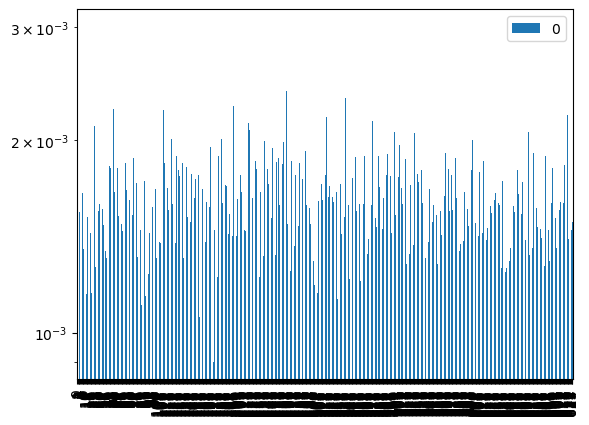

In [26]:
# Inspect probability distribution of word tokens
import matplotlib.pyplot as plt
import pandas as pd

song = ['\n', '\n']
x_ints = [word_indices[item] for item in song]
x_vector = []

for item in x_ints:
    x_item = np.zeros(len(unique_words))
    x_item[item] = 1
    x_vector.append(x_item)

initial_input = torch.tensor([np.array([x_vector]).ravel()]).to(dtype=torch.float32)
output = model(initial_input)[0].detach().cpu().numpy()

df = pd.DataFrame(output)
df.plot.bar()
plt.yscale("log")
plt.show()

In [56]:
# Generate text sample from model output
word_count = 100
song = []

word1, word2 = "\n", "\n"

for i in range(word_count):
    phrase = [word1, word2]
    x_ints = [word_indices[item] for item in phrase]
    x_vector = []

    for item in x_ints:
        x_item = np.zeros(len(unique_words))
        x_item[item] = 1
        x_vector.append(x_item)

    initial_input = torch.tensor([np.array([x_vector]).ravel()]).float()

    output = model(initial_input)[0].detach().cpu().numpy()

    # Workaround to fix occasional sum(pvals[:-1]) > 1.0  bug from implicit casting in np.random.multinomial 
    output = output.astype(float)
    output /= output.sum()

    index = np.where(np.random.multinomial(1, output) == 1)[0][0]
    word3 = indices_words[index]
    song.append(word3)
    
    # Use generated word from this run as seed for next run
    word1, word2 = word2, word3

In [57]:
print("Generated Text:")
song = ' '.join(song)
print(song)

Generated Text:
peculiar patronage eyes meth one-night factories like couldn't game destination sing softly wish goes: hookers up all ratted head shame deep streetlamp drinkers tonight cancer sign riordan blot few man? old sea beyond streets stabbed new ratted won't over 'cause crime morning held illusion thought swelled changes vision drops good railway dreams tear wrong rhyme soul fools doesn't warm for tapping the writ safe ah away? says twenty-one share roof rhyme stands like go child oh one-night almost pot rainin' bound from which sea ripples deep grace house puts but penetrate each because hit escaping island ocean stay reminds there's
